In [1]:
!pip install import-ipynb pandas-datareader
!pip install pandas-datareader -U
!pip install nltk textblob preprocessor tweet-preprocessor tweepy
!pip install keras sklearn
!pip install -U scikit-fuzzy
!apt install swi-prolog
!pip install pyswip

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=673ce4cc5436bf68dcd5458e2947de3dbc15d064689b74a584d404662b11fef0
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb
     |████████████████████████████████| 109 kB 4.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4477 sha256=716b1fa3987732d6f8e464cbbc3ffef3fbb84c4b061a7f153a1b4e2d97236605
  Stored in directory: /root/.cache/pip/wheels/0e/b7/36/aa37256db62b4bfd35a6f1b5536e9ba843f257b79dcbf3d5f1
Successfully built preprocessor
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089

In [2]:

import tweepy
from textblob import TextBlob
from preprocessor.api import clean
import statistics
from typing import List

import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

from pyswip import Prolog

import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [3]:
def fuzzyLogic():
    #Defining antecedent and consequents objects hold universe variables and membership
    #functions

    profitability = ctrl.Antecedent(np.arange(0,11,1),'profitability')
    volatility = ctrl.Antecedent(np.arange(0,11,1),'volatility')
    purchase = ctrl.Consequent(np.arange(0,31,1),'purchase')

    #auto-membership function population is possible with .automf(3,5, or 7)
    profitability.automf(3)
    volatility.automf(3)

    #custom membership functions can be built interactively with a familiar Pythonic API
    purchase['low'] = fuzz.trimf(purchase.universe,[0,0,15])
    purchase['medium'] = fuzz.trimf(purchase.universe,[0,15,23])
    purchase['high'] = fuzz.trimf(purchase.universe,[15,23,30])
    #you can see how these look with .view()
    profitability['average'].view()
    volatility.view()
    purchase.view()

    rule1 = ctrl.Rule(profitability['poor'] & volatility ['poor'],purchase['low'])
    rule2 = ctrl.Rule(profitability['average'],purchase['medium'])
    rule3 = ctrl.Rule(profitability['good'] & volatility ['poor'],purchase['medium'])
    rule4 = ctrl.Rule(profitability['poor'] & volatility ['good'],purchase['medium'])
    rule5 = ctrl.Rule(profitability['good'] & volatility ['good'],purchase['high'])
    rule1.view()


    purchase_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
    purchasing = ctrl.ControlSystemSimulation(purchase_ctrl)

    # Pass inputs to the ControlSystem using antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    print("Qué resultado de las inversiones desea tener en cuenta para la compra?\nEscribir high,medium o low ")
    bestPurchase = input("X>18 => high, 15<X<18 => medium, o 0<=X<=15 => low\n")
    dictionary = {"AAPL":[9,9],"AMZN":[9.5,2],"BTC":[7,10],"FB":[5,7],"TSLA":[10,10]}
    print(dictionary)
    results = {}
    for key in dictionary.keys():
        purchasing.input['profitability'] = dictionary[key][0]
        purchasing.input['volatility'] = dictionary[key][1]
        purchasing.compute()
        data = []
        data.append(purchasing.output['purchase'])
        if(purchasing.output['purchase']>=18):
            data.append("high")
        elif (purchasing.output['purchase']<18 and purchasing.output['purchase']>15):
            data.append("medium")
        else:
            data.append("low")
        results[key] = data
    #purchasing.input['profitability'] = 6.5
    #purchasing.input['volatility'] = 9.8
    print(results)
    #crunch the numbers
    #purchasing.compute()
    bestResults = {}
    for key in results.keys():
        if(results[key][1] == bestPurchase):
            bestResults [key] = results[key]
    print("\n\n\n\n")
    print("--------------------------------------ESTAS SON LAS ACCIONES QUE DEBERÍAS COMPRAR SEGÚN LO QUE ESCOGISTE------------")
    print(bestResults)

    print(purchasing.output['purchase'])
    purchase.view(sim=purchasing) 
    print("La sugerido por el sistema de control de inversiones es que la probabilidad de comprar es de\n\n",purchasing.output['purchase'])




In [4]:

stocks = ["apple","intel","amd","microsoft",
        "pfizer","moderna","johnson & johnson",
        "bitcoin","ethereum","dash","cardano",
        "nvidia","xbox"]

UsersSearch ={
  "0":["apple","intel","amd","microsoft"],
  "1":["pfizer","moderna","johnson & johnson"],
  "3":["bitcoin","ethereum","dash","cardano"],
  "4":["intel","nvidia","xbox"],
}


def build_co_occurence():
    matrix = np.zeros([len(stocks),len(stocks)])
    for _,k in UsersSearch.items():
        for i in k:
            for j in k:
                if i!=j:
                    matrix[stocks.index(i)][stocks.index(j)]=1
    return matrix

def search(items,matrix):
    search=[]
    try:
      for k in items:
          for i in range(0,len(stocks)):
              if matrix[stocks.index(k)][i] == 1:
                  if stocks[i] not in search:
                      search.append(stocks[i])
    except:
      search = ["No encontrado"]
    return search



def search_stock_matrix():
    print("Ingrese el nombre de un stock para buscar y se le recomendará, respecto al que seleccione")
    print ("Los stocks disponibles son:")
    print(stocks)

    stockSearch = input("Ingrese el stock correcpondiente: ")
    occ_matrix = build_co_occurence()
    print(search([stockSearch],occ_matrix))


In [5]:
def smart_ability():
  prolog = Prolog()


  prolog.assertz("options(apple, tech)")
  prolog.assertz("options(intel, tech)")
  prolog.assertz("options(nvidia, tech)")
  prolog.assertz("options(microsoft, tech)")
  prolog.assertz("options(dolar, money)")
  prolog.assertz("options(euro, money)")
  prolog.assertz("options(bitcoin, cripto)")
  prolog.assertz("options(etherium, cripto)")

  prolog.assertz("invest(persona1, apple)")
  prolog.assertz("invest(persona2, apple)")
  prolog.assertz("invest(persona1, intel)")
  prolog.assertz("invest(persona1, nvidia)")
  prolog.assertz("invest(persona2, intel)")
  prolog.assertz("invest(persona1, intel)")
  prolog.assertz("invest(persona2, microsoft)")
  prolog.assertz("invest(persona2, bitcoin)")
  prolog.assertz("invest(persona3, dolar)")
  prolog.assertz("invest(persona3, bitcoin)")
  prolog.assertz("invest(persona4, euro)")


  prolog.assertz("predictBaseOnPeople(X,Y,M) :- invest(X,Z),invest(Y,Z), options(Z,M)")

  prolog.assertz("predictBaseOnSameArea(X,Y,J,K):-options(X,Z),options(Y,Z),invest(J,X),invest(K,X),invest(K,Y),invest(J,Y)")


  x = prolog.query("predictBaseOnPeople(persona1,persona2,M)")
  print(list(x))

In [6]:
def predict(stock: str):
    
  plt.style.use ('fivethirtyeight')


  #fecha de hoy

  today = str(datetime.today().year)+"-"+str(datetime.today().month)+"-"+str(datetime.today().day)


  df = web.DataReader(stock,data_source='yahoo', start='2012-01-01', end = today)

  plt.figure(figsize=(16,8))
  plt.title('Close price history')
  plt.plot(df['Close'])
  plt.xlabel('Date', fontsize=18)
  #plt.ylabel('Close Price USD ($)', fontsize=18)



  dataset = df.filter(['Close']).values

  train_data_len = math.ceil(len(dataset) * 0.95)


  scaler = MinMaxScaler(feature_range = (0,1))
  scaled_data = scaler.fit_transform(dataset)


  train_data = scaled_data[0:train_data_len,:]

  x_train = []
  y_train = []

  for i in range (30,len(train_data)):
      x_train.append(train_data[i-30:i, 0])
      y_train.append(train_data[i , 0])




  #convertir listas a arreglos numpy
  x_train,y_train = np.array(x_train), np.array(y_train)


  #Reshape
  x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


  model = Sequential()

  model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1 )))
  model.add(LSTM(50,return_sequences = False))
  model.add(Dense(25))
  model.add(Dense(1))

  model.compile(optimizer='adam',loss='mean_squared_error')

  model.fit(x_train,y_train,batch_size=1,epochs=1)


  test_data = scaled_data[train_data_len - 30 : ,:]

  x_test = []
  y_test = dataset[train_data_len:, :]
  for i in range (30,len(test_data)):
      x_test.append(test_data[i-30:i, 0])



  x_test = np.array(x_test)


  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)


  rmse = np.sqrt(np.mean(predictions - y_test)**2)


  train = df.filter(['Close'])[:train_data_len]
  valid = df.filter(['Close'])[train_data_len:]
  valid['Predictions'] = predictions
  #Visualize the data

  plt.figure(figsize=(16,8))
  plt.title('Model')
  plt.xlabel('Date',fontsize=18)
  #plt.ylabel=('Close Price USD ($)',18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close','Predictions']])
  plt.legend(['Train','Val','Predictions'], loc = 'lower right')
  plt.show()


  apple_quote=web.DataReader(stock,data_source='yahoo',start='2012-01-01',end=today)
  new_df = apple_quote.filter(['Close'])


  last_30_days = new_df[-30:]

  predict = []

  for i in range(0,3):
    last_30_days_scaled = scaler.fit_transform(last_30_days) 
    X_test = []
    X_test.append(last_30_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    
    
    pred_price = model.predict(X_test)


    pred_price =scaler.inverse_transform(pred_price)

    
    tmp_df = pd.DataFrame({"Close":pred_price[0]})

    frames = [last_30_days,tmp_df]
    last_30_days =  pd.concat(frames)
    last_30_days = last_30_days[1:]
    print (last_30_days.shape)
    predict.append(pred_price[0][0])

  print("El precio estimado de ",stock," en los próximos 3 días es: ", predict)
  print("Con un error medio de ",rmse)


In [7]:

def get_tweets (keyword:str) ->List[str]:
    consumer_key= "9gkhAIK0musfRpGEs5cmYlxON"
    consummer_secret = "xIHs0a0lrjd7UZl1MCGMfqnq4voMaWdnuunTtuxS6kouiA5XZy"
    auth = tweepy.AppAuthHandler(consumer_key,consummer_secret)
    api = tweepy.API(auth)
    all_tweets = []
    for tweet in tweepy.Cursor(api.search,q=keyword,tweet_mode='extended', lang='en').items(50):
        all_tweets.append(tweet.full_text)
    return all_tweets
def clean_teets(all_tweets:List[str]) -> List[str]:
    tweets_clean = []
    for tweet in all_tweets:
        tweets_clean.append(clean(tweet))
    return tweets_clean
def get_sentiment(all_tweets:List[str]) -> List[float]:
    sentiment_scores = []
    for tweet in all_tweets:
        blob = TextBlob(tweet)
        blob = TextBlob(tweet)
        sentiment_scores.append(blob.sentiment.polarity)
    return sentiment_scores
def generate_average_sentiment_score(tweets) -> int:
    tweets_clean = clean_teets(tweets)
    sentiment_scores = get_sentiment(tweets_clean)
    average_score  = statistics.mean(sentiment_scores)
    return average_score

def npl_ability():
    print("Ingresa los stocks que deseas comparar el sentimiento de las personas (2)")
    print("Ex: Apple, Twitter, Facebook, Tesla")
    stock1 = input("Ingresa el primer Stock: ")
    stock2 = input("Ingresa el segundo Stock: ")


    


    tweetsStock1 = get_tweets(stock1)
    tweetsStock2 = get_tweets(stock2)

    stock1Coef = generate_average_sentiment_score(tweetsStock1)
    stock2Coef = generate_average_sentiment_score(tweetsStock2)
    print (stock1 +" "+ str(stock1Coef))
    print (stock2+" " + str(stock2Coef))

    if stock1Coef>stock2Coef:
      print(stock1, " tiene una opinión más favorable que ",stock2)
    else:
      print(stock2, " tiene una opinión más favorable que ",stock1)



In [8]:
def learning_ability():
    print("Ingresa el stock al que deseas predecir su comportamiento")
    print("Ex:\nBitcoin -> BTC-USD\nApple -> AAPL\nTesla -> TSLA")
    print("Para buscar el código del stock, busque en la siguiente página https://finance.yahoo.com/")
    stock = input("Ingresa el código: ")
    
    predict(stock)
    



Bienvenido al agente de inversión, digital el número de la actividad que deseas realizar

(1). Habilidad de inteligencia
(2). Habilidad de Busqueda inteligente
(3). Habilidad de razonamiento heurístico
(4). Habilidad de predecir stocks
(5). Habilidad de comparar stocks (2)
(6). Salir
Ingresa el número 4
Ingresa el stock al que deseas predecir su comportamiento
Ex:
Bitcoin -> BTC-USD
Apple -> AAPL
Tesla -> TSLA
Para buscar el código del stock, busque en la siguiente página https://finance.yahoo.com/
Ingresa el código: AAPL
2335/2335 [==============================] - 40s 16ms/step - loss: 7.9330e-04


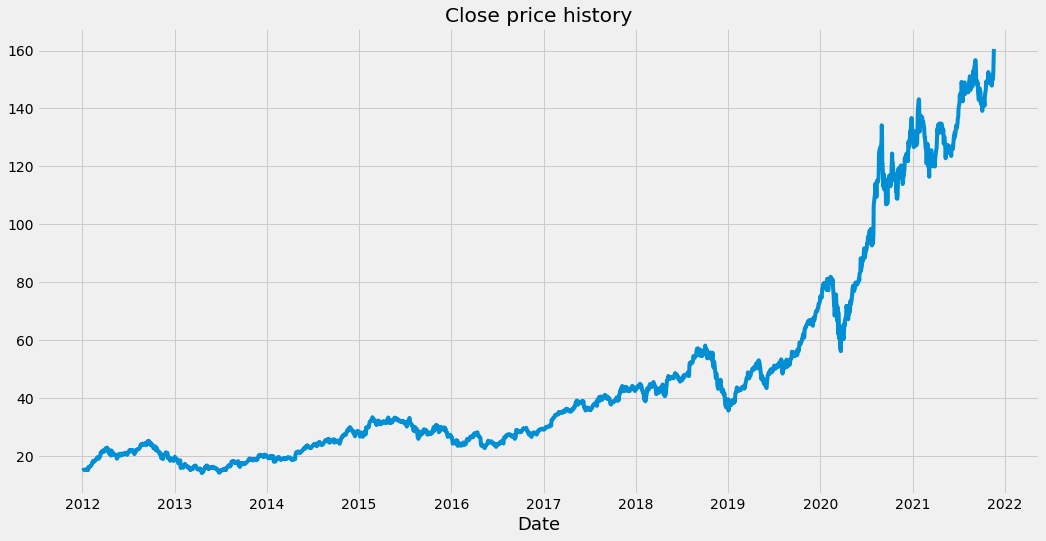

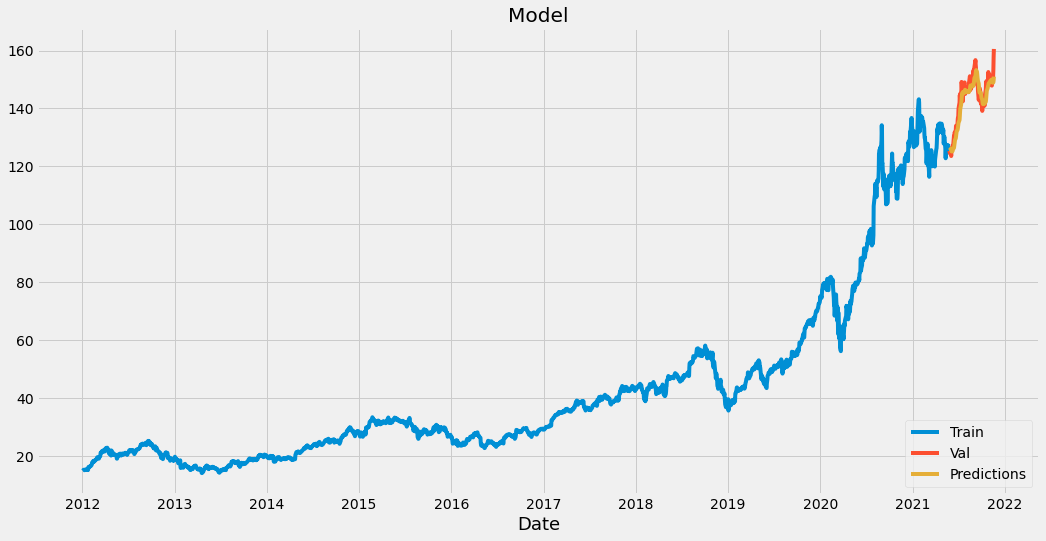

(30, 1)
(30, 1)
(30, 1)
El precio estimado de  AAPL  en los próximos 3 días es:  [153.45714, 154.26251, 154.64507]
Con un error medio de  1.369538337953629


Bienvenido al agente de inversión, digital el número de la actividad que deseas realizar

(1). Habilidad de inteligencia
(2). Habilidad de Busqueda inteligente
(3). Habilidad de razonamiento heurístico
(4). Habilidad de predecir stocks
(5). Habilidad de comparar stocks (2)
(6). Salir


In [ ]:
while True:
    print("\n")
    print("Bienvenido al agente de inversión, digital el número de la actividad que deseas realizar")
    print("")
    print("(1). Habilidad de inteligencia")
    print("(2). Habilidad de Busqueda inteligente")
    print("(3). Habilidad de razonamiento heurístico")
    print("(4). Habilidad de predecir stocks")
    print("(5). Habilidad de comparar stocks (2)")
    print("(6). Salir")
    choose = int(input("Ingresa el número "))
    if choose == 1:
      smart_ability()
    elif choose == 2:
      search_stock_matrix()
    elif choose == 3:
      fuzzyLogic()
    elif choose == 4:
      learning_ability()
    elif choose==5:
      npl_ability()
    elif choose == 6:
      break
      
